# Library installation

In [6]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB ? eta -:--:--
   ---------- ---------------------------- 61.4/235.6 kB 544.7 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 819.2 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/235.6 kB 708.1 kB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.0 MB/s eta 0:00:00


In [7]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     -------------- ------------------------- 30.7/83.6 kB ? eta -:--:--
     -------------- ------------------------- 30.7/83.6 kB ? eta -:--:--
     -------------------------------------  81.9/83.6 kB 573.4 kB/s eta 0:00:01
     -------------------------------------- 83.6/83.6 kB 520.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Downloading Dataset

In [ ]:
dataSetPath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(dataSetPath)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**tenure:** the average time measured in years since customers initiated their contracts or business with E2open

**Senior Citizen**:
typically refers to individuals who are at or above a certain age threshold, often 60 or 65 years old. The exact age at which someone is considered a senior citizen can vary between countries and organizations.

**Churn:** refers to the rate at which customers or subscribers stop using a service or product within a given period.

**Print the info**

we can see that there are numeric values in the data, like ***SeniorCitizen*** , ***tenure*** and ***monthly charge***
but there is a **TotalCharges** column that seems like it should be numeric so we need to see the data


In [ ]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Analysis


## Handlling missing values

as we see the *TotalCharges* column contains numbers so we must explore it further
:


In [ ]:
# Get the indices of missing values
missing_indices = df.index[df['TotalCharges'].isnull()].tolist()
# Get the indices of non-numeric values
non_numeric_indices = df.index[~pd.to_numeric(df['TotalCharges'], errors='coerce').notna()].tolist()

# Output the results
print(f"Indices of missing values: {missing_indices}")
print(f"Indices of non-numeric values: {non_numeric_indices}")

Indices of missing values: []
Indices of non-numeric values: [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [ ]:
non_numeric_charges = df.loc[non_numeric_indices]
# Print values at non-numeric indices
print(f"Values at non-numeric indices: \n{non_numeric_charges}")


Values at non-numeric indices: 
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service           

we can impute the values with the mean or midean or any other imputation meathod but we can examine the data more to check what makes it null


In [ ]:
print(non_numeric_charges.nunique()[non_numeric_charges.nunique()==1])

SeniorCitizen    1
Dependents       1
tenure           1
TotalCharges     1
Churn            1
dtype: int64


after examining the values of Total charges we can see that it's empty but not null
after examining the whole frame we can notice that the when total charges is empty some columns have the same values we can link that to **Tenure** as it is always **zero** meaning that the customer never used the service yet.

**fixing the issue**

now we can edit impute the values that are missing to zero as it meant there are no total charges

In [ ]:
df.loc[non_numeric_indices,'TotalCharges']=0

In [ ]:
non_numeric_indices = df.index[~pd.to_numeric(df['TotalCharges'], errors='coerce').notna()].tolist()
print(non_numeric_indices)

[]


In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


now we can check if there is any null values in the columns


In [ ]:

# Count the number of NaN values in each column
nan_count_per_column = df.isna().sum()

# Display the count of NaN values per column
print(nan_count_per_column)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


as we see there is no missing values in the data so we can keep exploring the data relationships


## Relationship Analysis

In [ ]:
from matplotlib.cm import get_cmap
def nested_pie_chart(dataframe, outer_column, inner_column):
    """
    Create a nested pie chart to compare the distribution of inner_column within each unique value of outer_column.

    Parameters:
    - dataframe: pd.DataFrame, the input DataFrame
    - outer_column: str, the column representing the outer layer of the pie chart
    - inner_column: str, the column representing the inner layer of the pie chart

    Returns:
    - None (displays the plot)
    """
    def generate_colors(num_colors):
      cmap = get_cmap('viridis')
      return [cmap(i / num_colors) for i in range(num_colors)]

    # Count the occurrences of each unique value in the outer column
    outer_counts = dataframe[outer_column].value_counts()
    inner_counts = dataframe[inner_column]
        # Get unique values
    unique_values = dataframe[inner_column].unique()
    # Generate colors based on the number of unique values
    num_unique_values = len(unique_values)

    # Generate random colors
    #random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(num_unique_values)
    random_colors = generate_colors(num_unique_values)
    # Create a nested pie chart
    fig, ax = plt.subplots()

    # Calculate the total number of layers
    total_layers = len(outer_counts)
    # Iterate through each unique value in the outer column
    for i, outer_value in enumerate(outer_counts.index):
        # Filter the DataFrame for the specific outer value
        subset_df = dataframe[dataframe[outer_column] == outer_value]

        # Count the occurrences of each unique value in the inner column within the subset
        inner_counts = subset_df[inner_column].value_counts()

        # Calculate the radius for the current layer
        radius = 0.6 - i * 0.55 / total_layers

        # Plot the nested pie chart for the current outer value
        wedges, texts, autotexts  = ax.pie(inner_counts, labels=None,labeldistance = 1, autopct='', startangle=90, radius=radius,colors=random_colors,wedgeprops=dict(width=0.3, edgecolor='white', linewidth=1))
        for wedge, autotext in zip(wedges, autotexts):
            angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
            x = radius* np.cos(np.radians(angle))
            y = radius* np.sin(np.radians(angle))
            percentage = (wedge.theta2 - wedge.theta1) / 360 *100

            autotext.set_position((x, y))
            autotext.set_text(f'{percentage:.1f}%')
        ax.annotate(
            outer_value,
            xy=(0, radius),
            ha='center',
            va='center',
            xytext=(0, radius),
            textcoords='offset points',

        )
    # Equal aspect ratio ensures that the pie is drawn as a circle
    ax.axis('equal')
    plt.title(f"Distribution of {outer_column} with respect to {inner_column}")
    # Add a legend for each unique value in the outer column
    ax.legend(inner_counts.index, title=inner_column)

    # Display the nested pie chart
    plt.show()


First we can remove the Customer ID column as it has no purpose

In [ ]:
df = df.drop('customerID',axis=1)

In [ ]:
# Count the number of unique values in each column
print(df.nunique())


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### For **categorical_featuresC**

For categorical features like "gender," "Partner," "Dependents," etc., we can create bar plots to visualize the distribution of each category with respect to Churn.

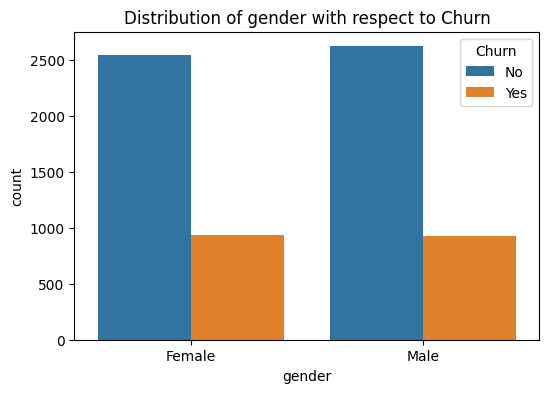

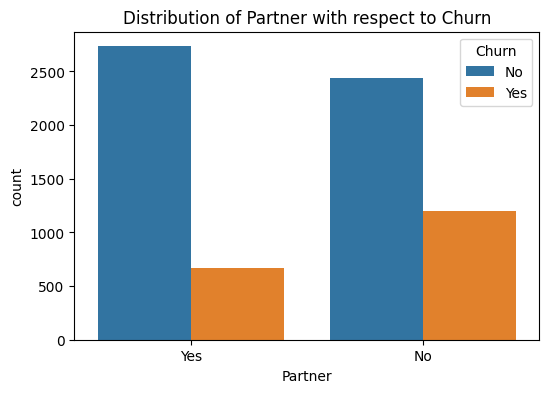

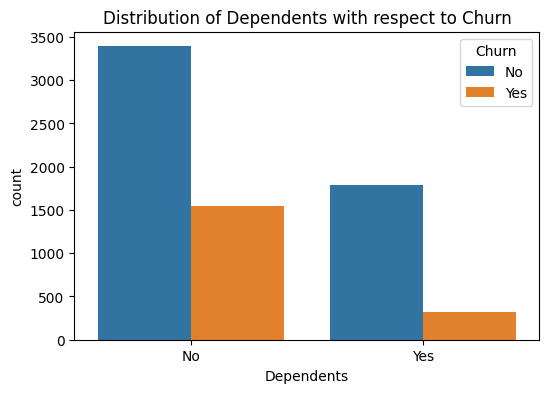

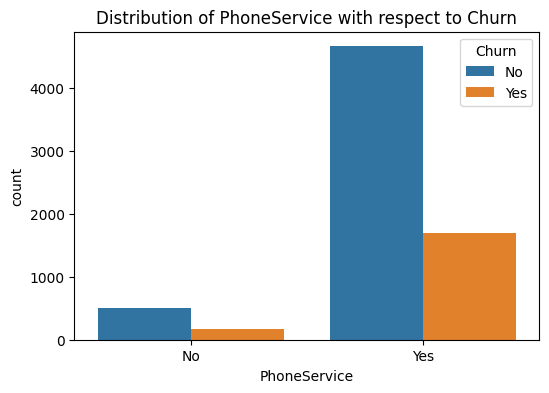

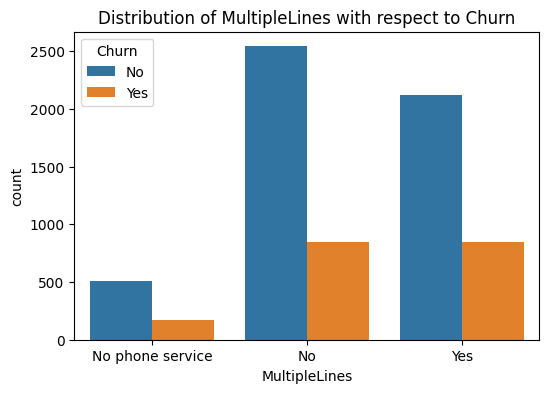

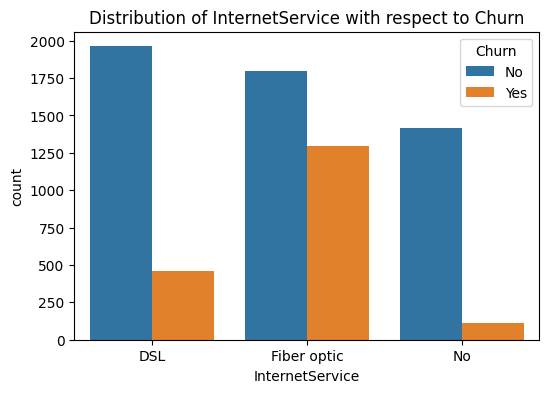

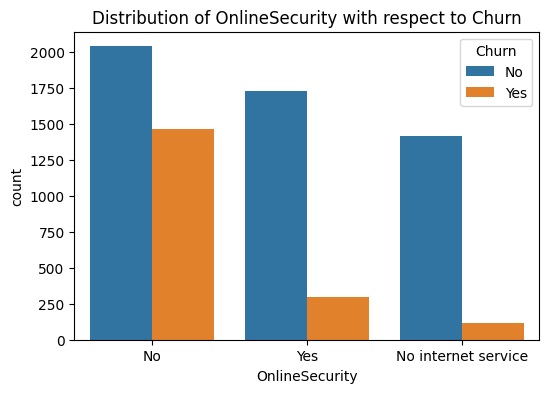

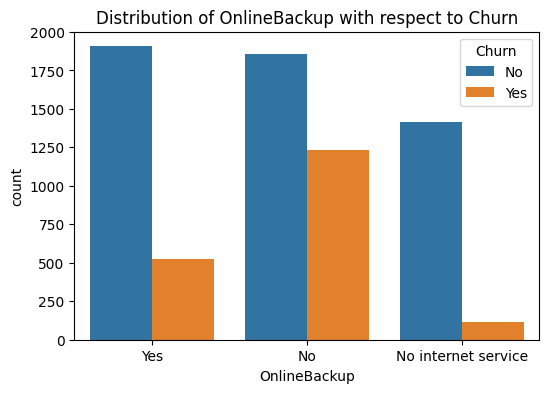

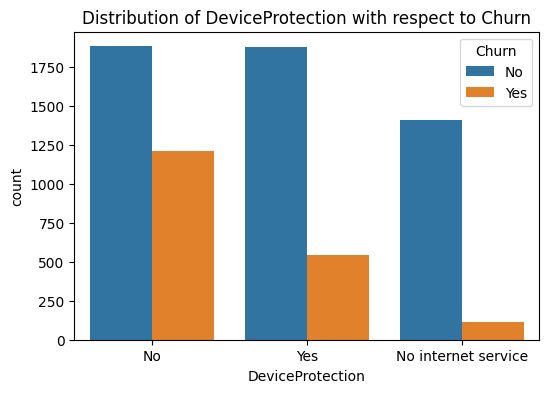

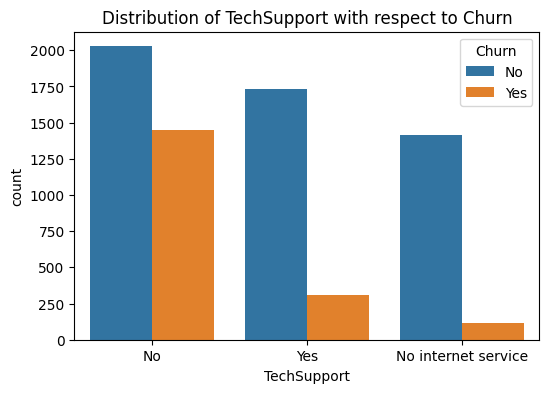

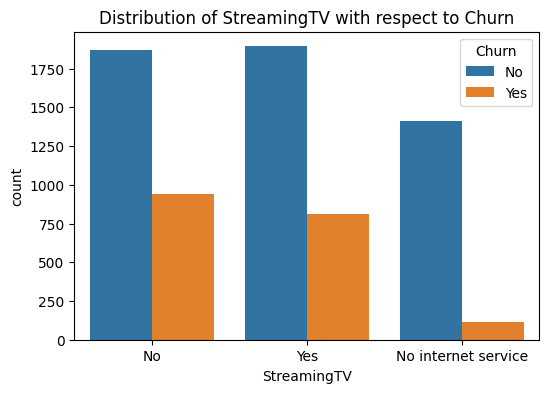

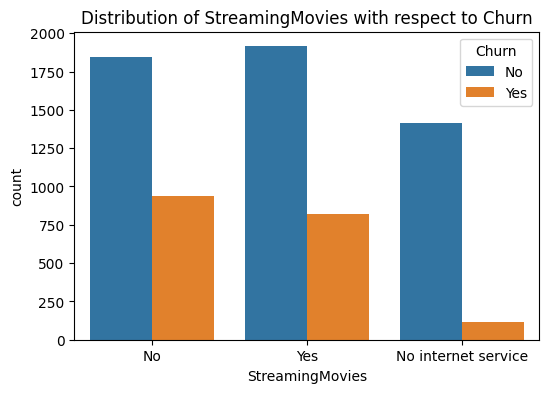

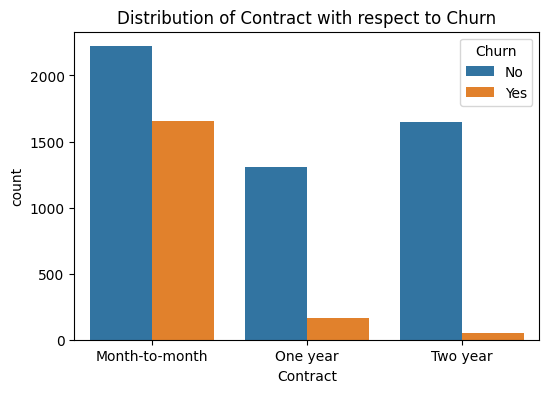

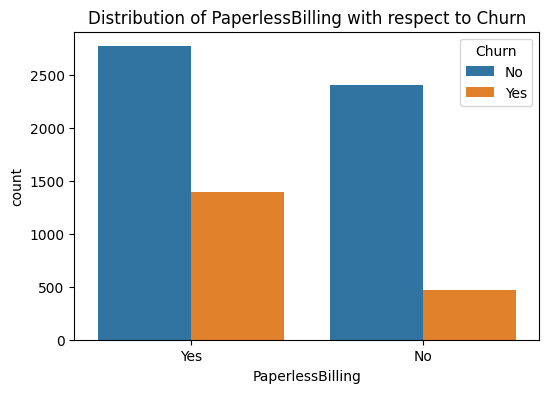

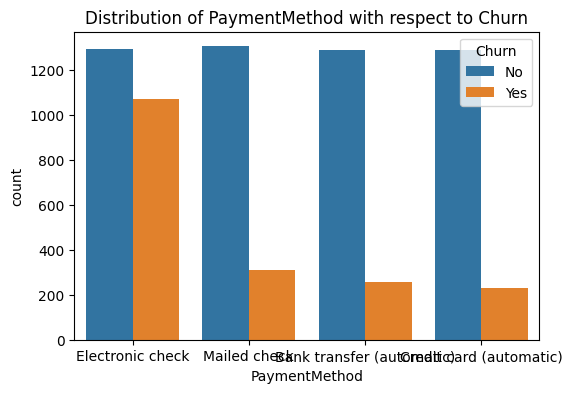

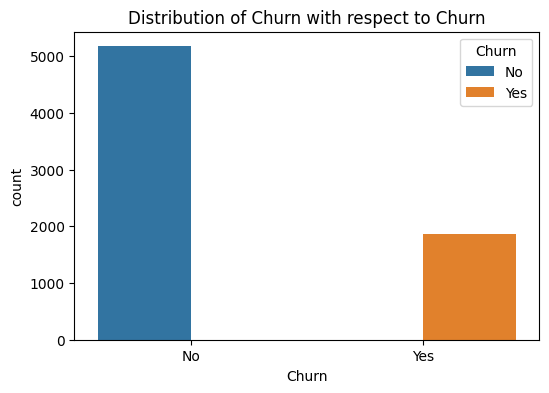

In [ ]:

categorical_features =  df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue="Churn", data=df)
    plt.title(f"Distribution of {feature} with respect to Churn")
    plt.show()

We can also create a Pie chart for better visualization

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


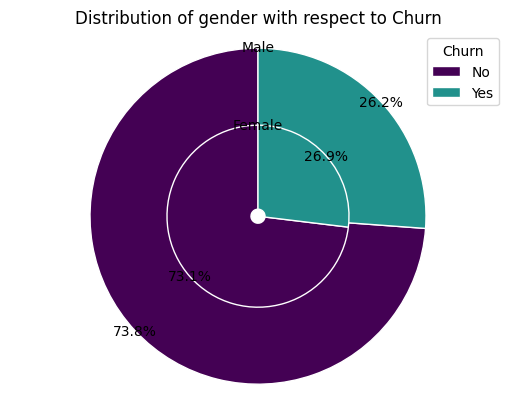

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


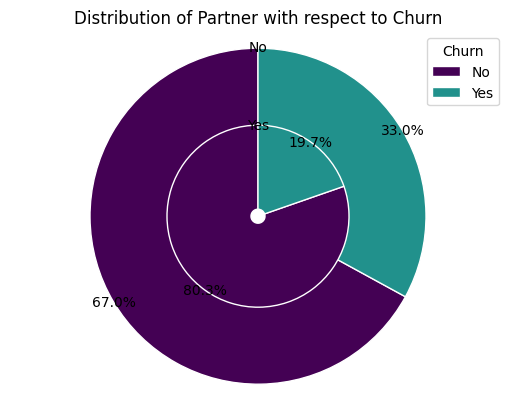

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


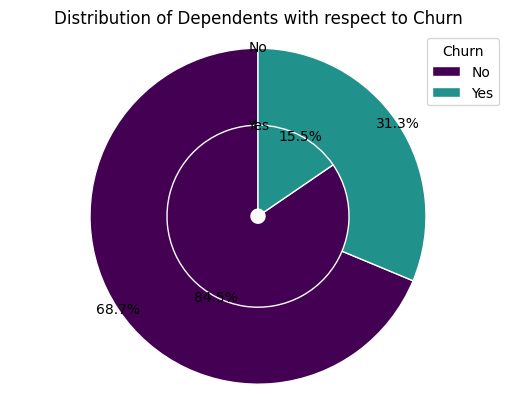

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


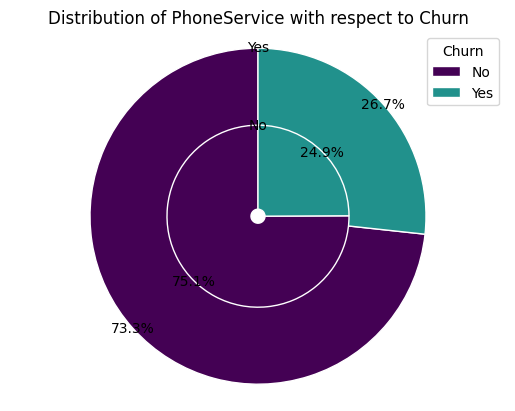

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


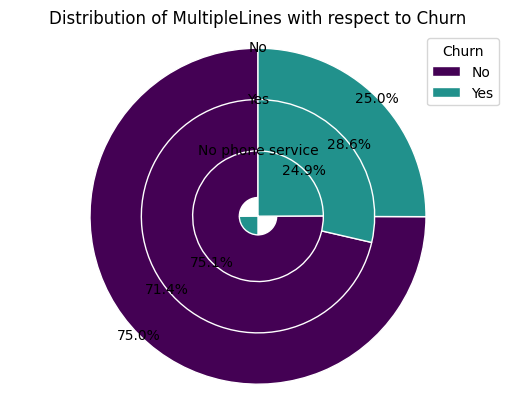

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


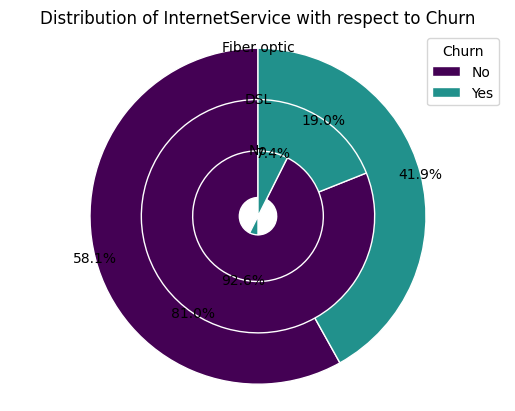

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


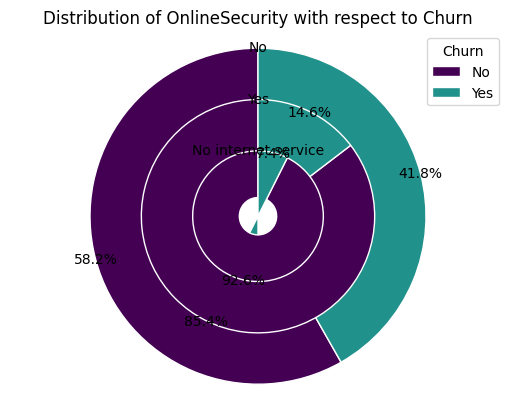

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


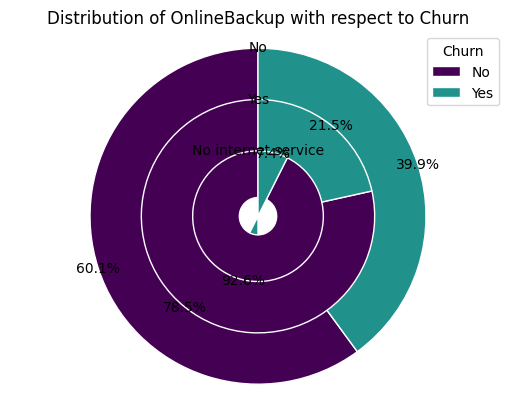

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


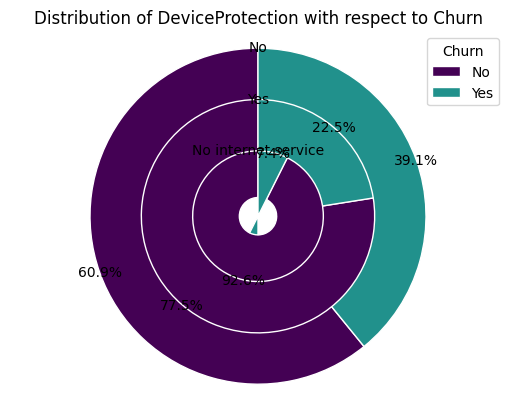

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


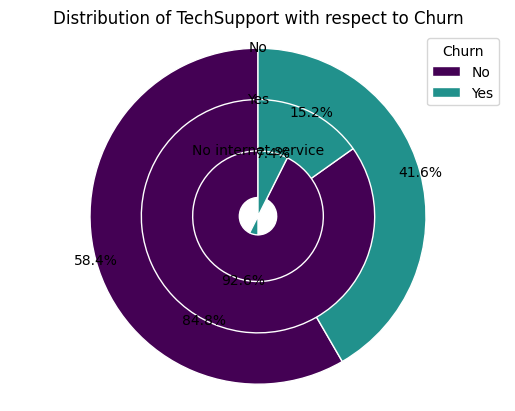

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


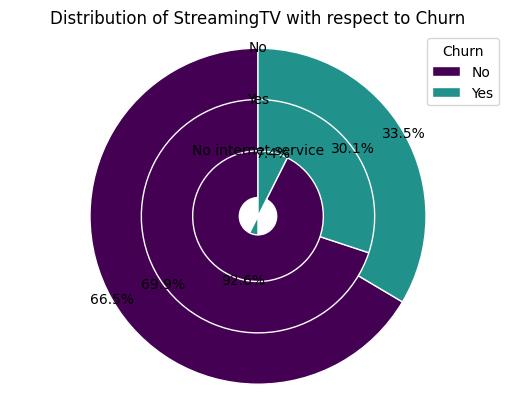

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


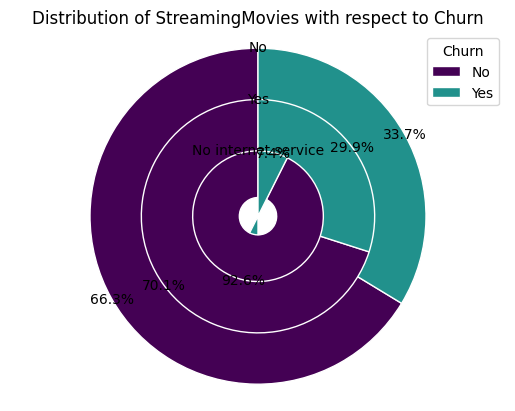

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


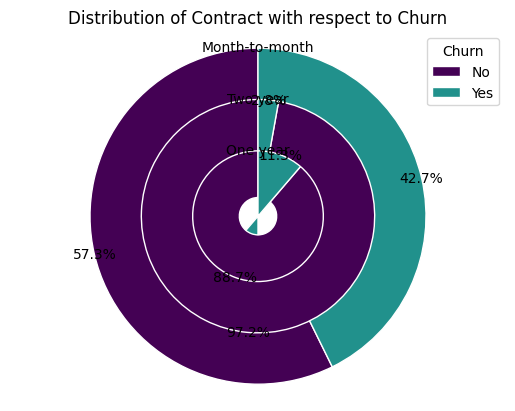

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


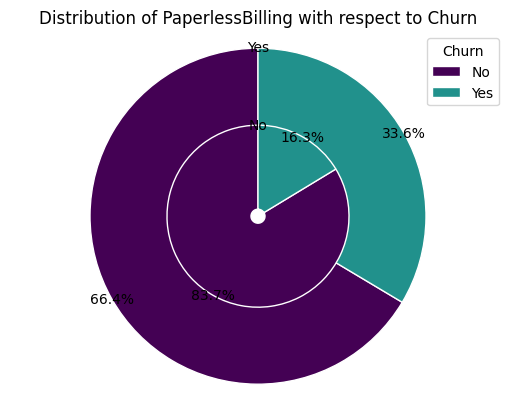

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


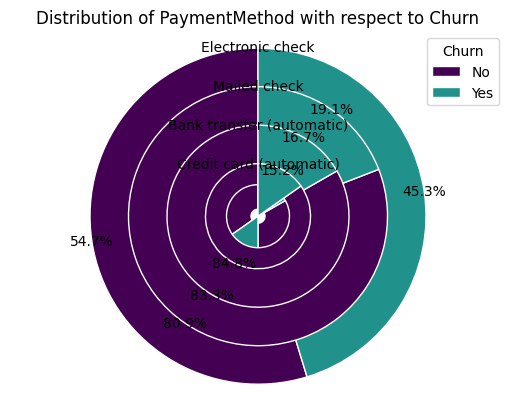

<ipython-input-17-c0694cbe3f6d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


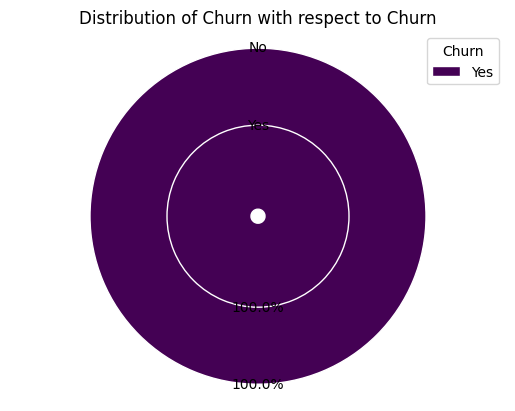

In [ ]:

categorical_features =  df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    nested_pie_chart(df,feature,'Churn')


from the above two charts we can see that there are values that have lettle impact on the Churn value like **gender** and **Multiple Lines** and
**Phone Service**

for other values like **Dependents** we can see that people with dependents have less chance to churn same goes with **Partener**

and people who use **fiber obtics** has more chance in churning

same goes for **Tech support**
people who uses tech support have lower chance in churning meaning that people can rage quit for a problem they faced and didn't reach help

**but** the most significant feature being the **contract** and **payment method**
for contract as we see people with month-month subscription have much churn value than yearly subscription it's reasonable as they have the opportunity to churn and return each month
for payment meathod we can see that paying with cards have very low chrun rate that electronic check as they are much easier for customers


### **for numeric Features**

For numerical features like "tenure," "MonthlyCharges," and "TotalCharges," you can use histograms or box plots.

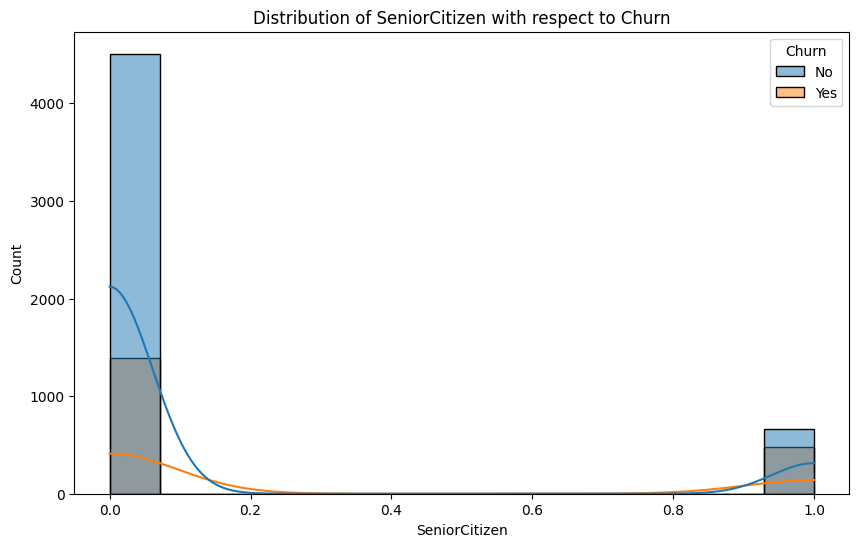

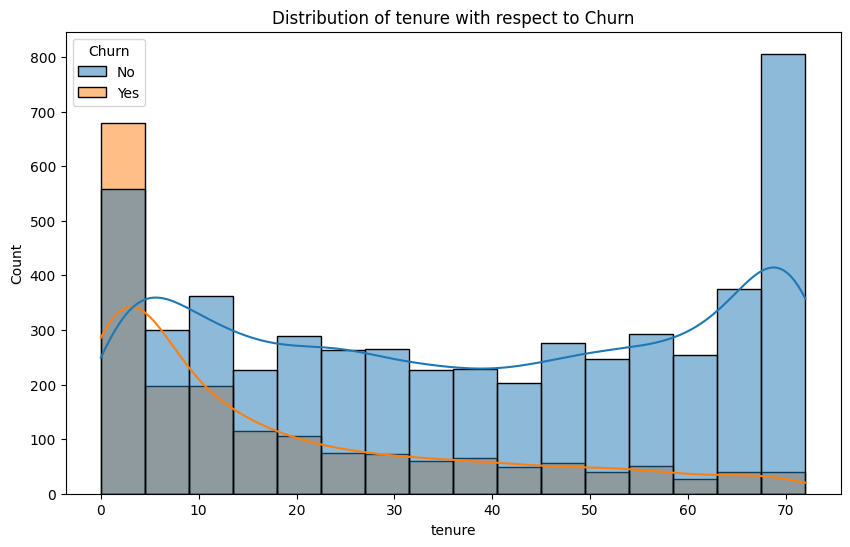

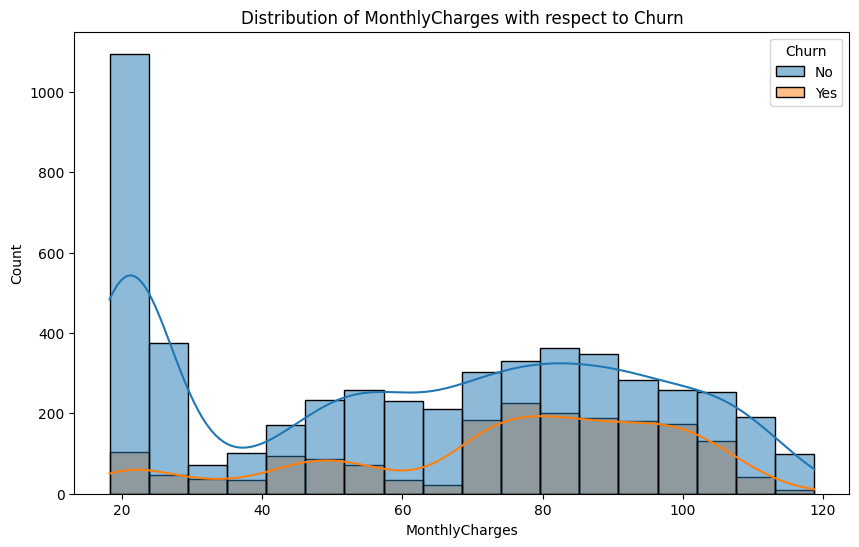

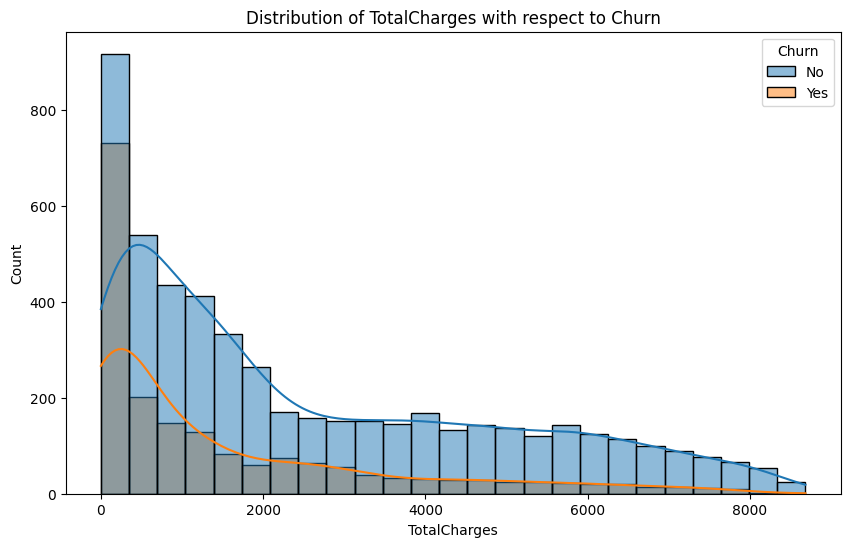

In [ ]:
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
def plot_hist(numerical_features,df=df):
  for feature in numerical_features:
      plt.figure(figsize=(10, 6))
      sns.histplot(x=feature, hue="Churn", data=df, kde=True)
      plt.title(f"Distribution of {feature} with respect to Churn")
      plt.show()
plot_hist(numerical_features)

if we look closely to the data we can see impalance wetween chrn Yes and No
so the we will look at the difference between the two bars for churn **yes** and **No**



we can see from the charts for
#### **tenure:**
we can see pretty stable histogram for Churn value **No** witch mean the period of use doesn't have efect in people staying but we can see for people leaving in this month we can see there is a huge spike at the begining meaning that most leaving people leave at the first few months

 we can see another spike at churn value **No** at high tenure meaning that there are loyal customers that stay for long period


#### **Monthly Charge:**
we can see a steady histogram no significant information except that people have higher chrn rate if the monthly charge is the monthly charge is large but we can see that also more people is staying meaning Churn value **NO** with higher monthly charge so the is low impact of monthly charge


####**Total Charge:**
for total charge we can see that when total charge increase we find a spike at first with total charge being close to zero that ensure the first conclusion from **tenure** that people have chance to quit in the first month but we can see the percentage between people who churned and who has not churned is increasing meaning that as they spend more they become attachet to the platform.


## **Correlation analysis**

<ipython-input-23-52d5f90e1eba>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


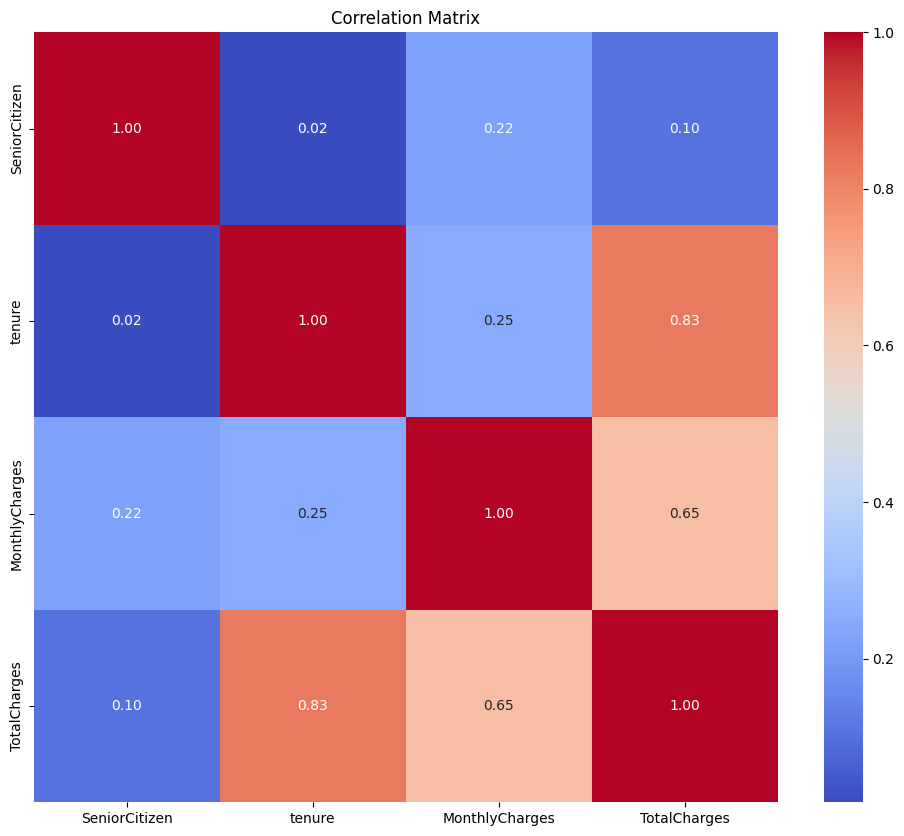

In [ ]:
def correlationMatric(df=df):
  plt.figure(figsize=(12, 10))

  correlation_matrix = df.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
  plt.title("Correlation Matrix")
  plt.show()
  return correlation_matrix
correlation_matrix = correlationMatric()

In [ ]:
print(correlation_matrix)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


we can see that the tenure and total charges are related.
also total charges is relatively related to monthly charges. we can explore more the data

In [ ]:
difference = abs(df['TotalCharges']/df['tenure'] -df['MonthlyCharges']) /df['MonthlyCharges']
print(difference>0.3)
index = difference.index[difference>0.3]
print(df.loc[index])

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
869     Male              0      No        Yes       3          Yes   
2374    Male              0      No         No       2          Yes   
2950    Male              0      No         No       4          Yes   
3945  Female              0      No         No       3           No   
4203  Female              0      No        Yes       7          Yes   
4634  Female              0      No         No       2          Yes   
4689  Female              0      No         No       2          Yes   
4969  Female              0     Yes         No       2          Yes   
5595  Female              0      No         No       2          Yes   
5673    Male              0      No         No       4          Yes   
6155    Male              0     Yes    

we can see that the monthly charges are mostly eual to total charges/tenure so we can remove it

In [ ]:
#df = df.drop(['MonthlyCharges','gender'],axis=1)

## **explore outliers**

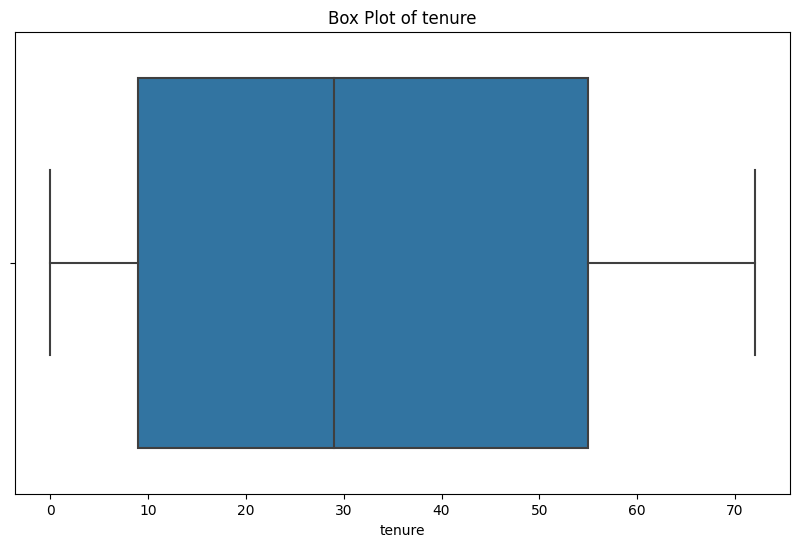

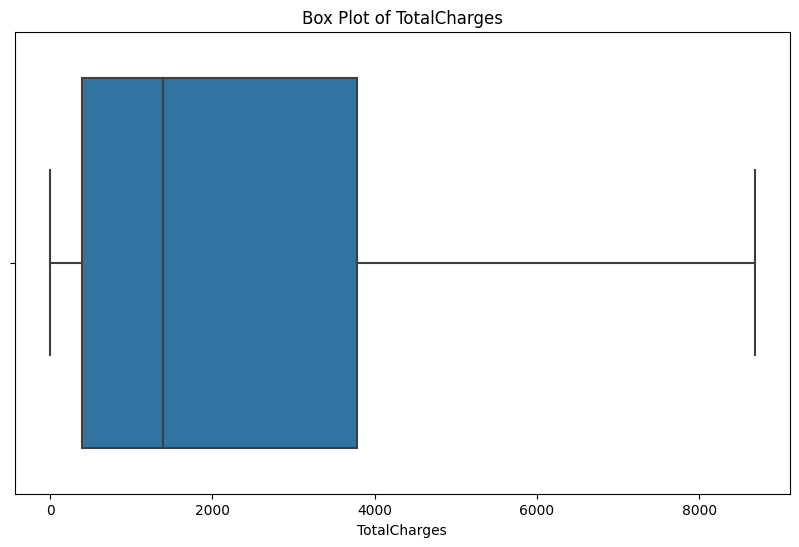

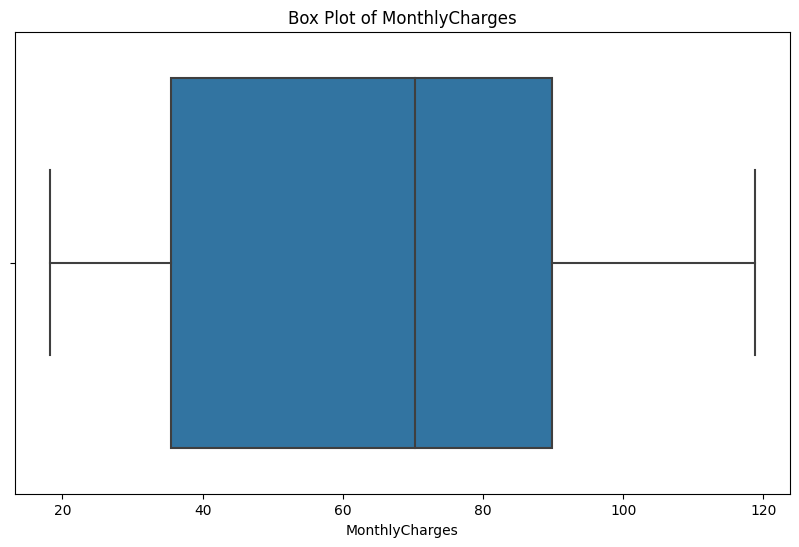

In [ ]:
numerical_features = ["tenure", "TotalCharges",'MonthlyCharges']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

we can see the **tenur** data is pretty balanced but we have a right winged shape in the total charges,

that suggests we scale the total charges using log scaller for better representation


In [ ]:
# Using Z-Scores to detect outliers
# the following code is a function to plot box for the features
def plot_box(dataframe,columns = ["tenure", "TotalCharges"]):
  numerical_features = columns

  for feature in numerical_features:
      plt.figure(figsize=(10, 6))
      sns.boxplot(x=dataframe[feature])
      plt.title(f'Box Plot of {feature}')
      plt.show()

we plot the histogram of the **TotalCharges** column

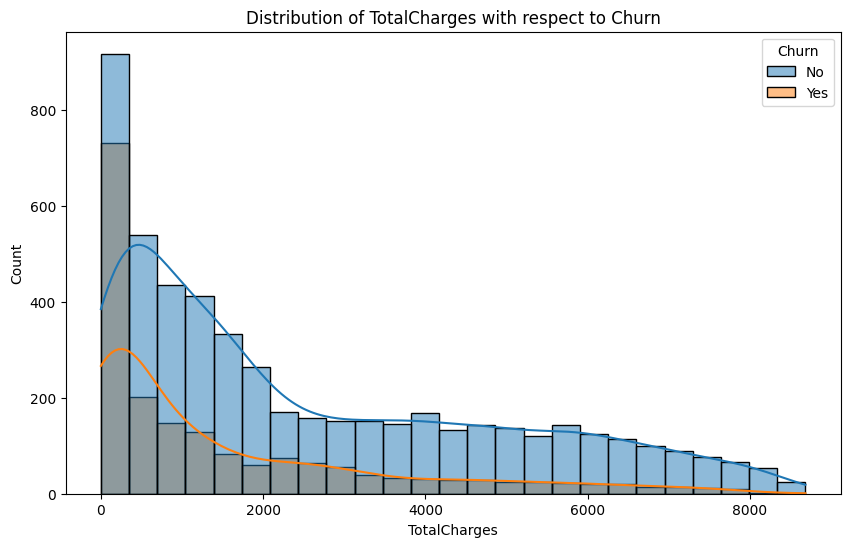

In [ ]:
plot_hist(['TotalCharges'])

we create a new column with the log scale of **total charges**

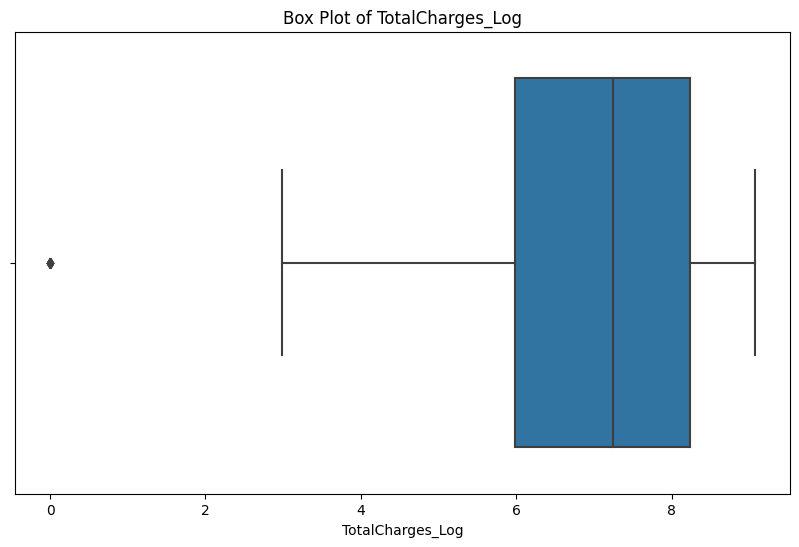

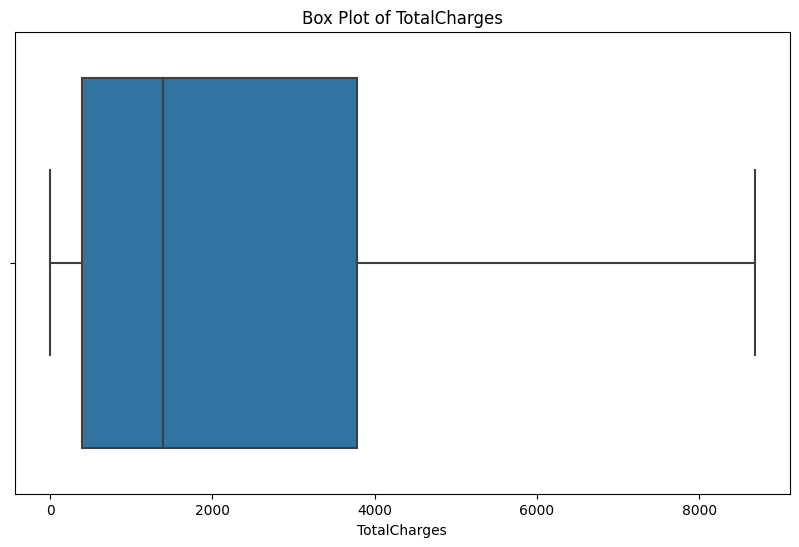

In [ ]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler

df['TotalCharges_Log'] = np.log1p(df['TotalCharges'])
plot_box(df,columns=["TotalCharges_Log", "TotalCharges"] )


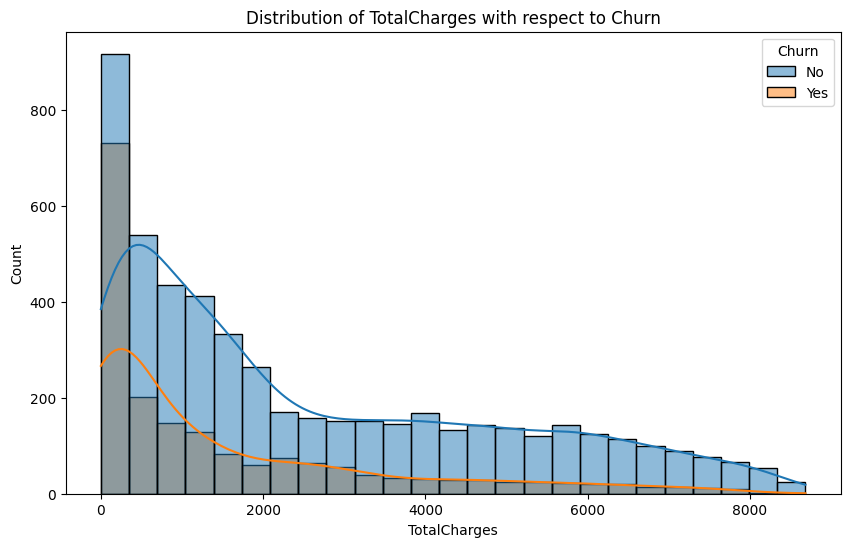

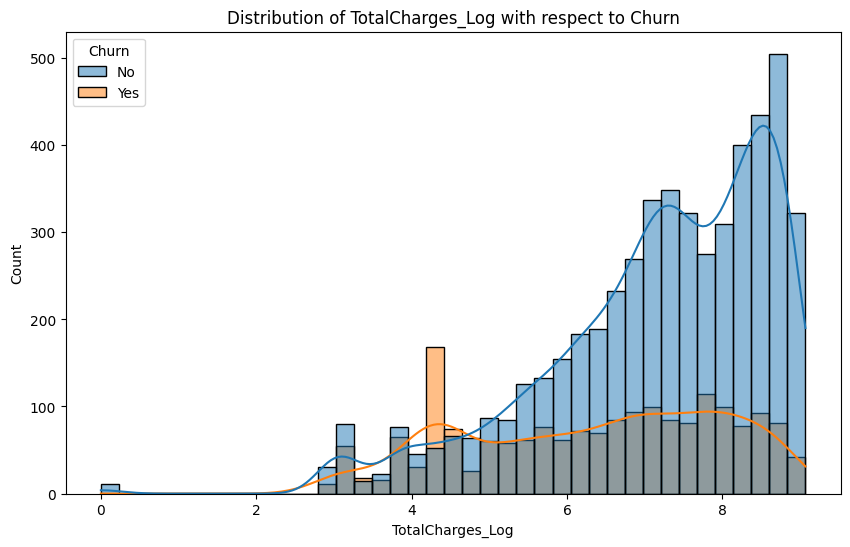

In [ ]:
plot_hist(['TotalCharges'])
plot_hist(['TotalCharges_Log'])


we can still see outliers in the data we can filter it using **Empirical Rule** wich indicates that For normally distributed data, you may use the empirical rule, which suggests that about 99.7% of the data falls within three standard deviations of the mean.


**we can notice that the outliers are the zero values that we imputed before so this step was completely useless unfortunately
🤕


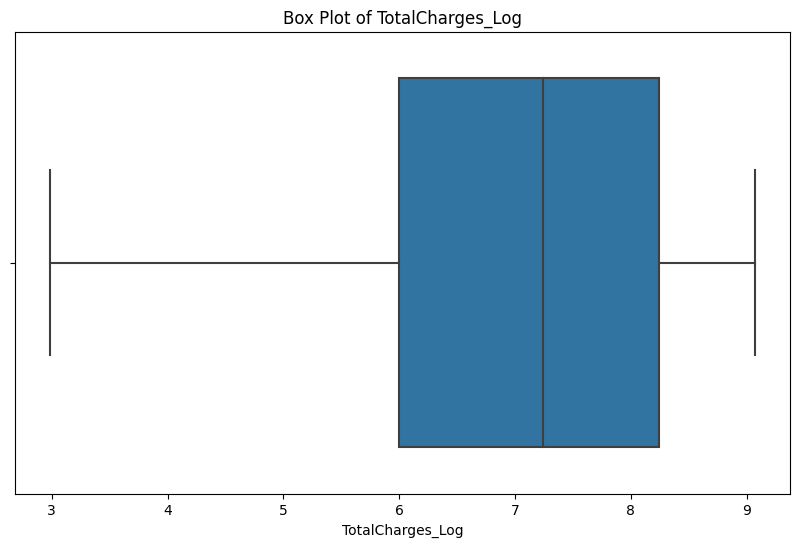

In [ ]:

# Calculate mean and standard deviation
mean_tenure = df['tenure'].mean()
std_tenure = df['tenure'].std()

mean_total_charges = df['TotalCharges_Log'].mean()
std_total_charges = df['TotalCharges_Log'].std()

# Set threshold based on the Empirical Rule (e.g., 3 standard deviations)
threshold_tenure = 3 * std_tenure
threshold_total_charges = 3 * std_total_charges

# Identify and remove outliers
outliers_tenure = (abs(df['tenure'] - mean_tenure) > threshold_tenure)
outliers_total_charges = (abs(df['TotalCharges_Log'] - mean_total_charges) > threshold_total_charges)

# Remove outliers from the original DataFrame
df_no_outliers = df[~(outliers_tenure | outliers_total_charges)].copy()
plot_box(df_no_outliers,columns = ['TotalCharges_Log'])

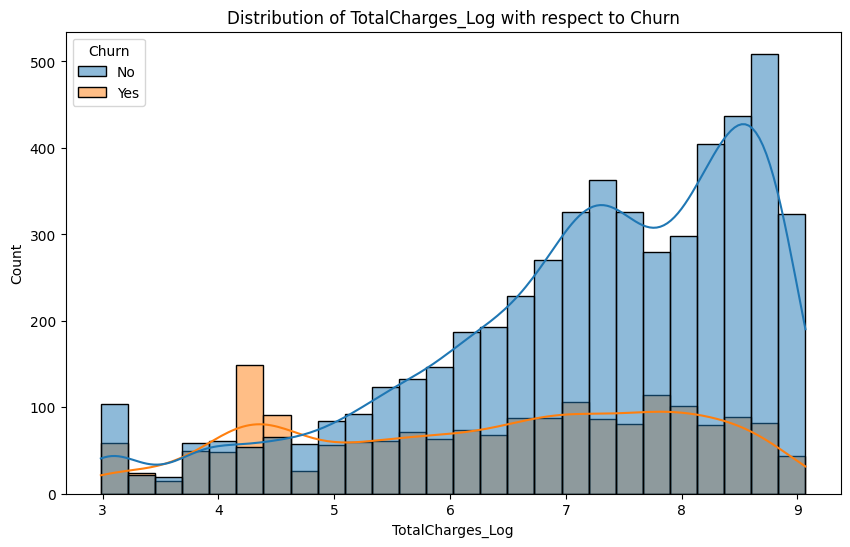

In [ ]:
plot_hist(['TotalCharges_Log'],df_no_outliers)

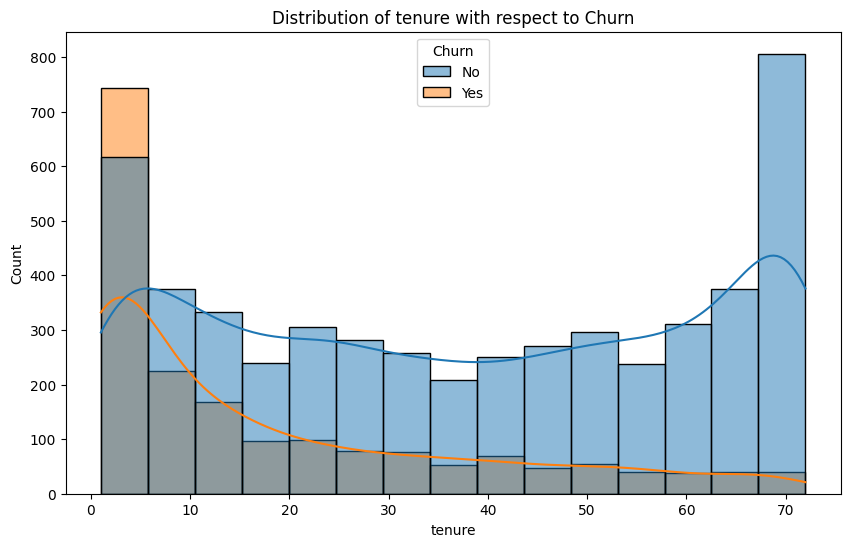

In [ ]:
plot_hist(['tenure'],df_no_outliers)

In [ ]:
# Assuming df is your DataFrame
df_encoded = df.copy()  # Create a copy to preserve the original DataFrame

# Apply ordinal encoding to each categorical column
for col in categorical_features:
    # Extract unique values and assign numbers
    unique_values = df[col].unique()
    mapping = {val: i for i, val in enumerate(unique_values)}

    # Apply ordinal encoding
    encoder = ce.OrdinalEncoder(cols=[col], mapping=[{"col": col, "mapping": mapping}])
    df_encoded[col] = encoder.fit_transform(df[[col]])


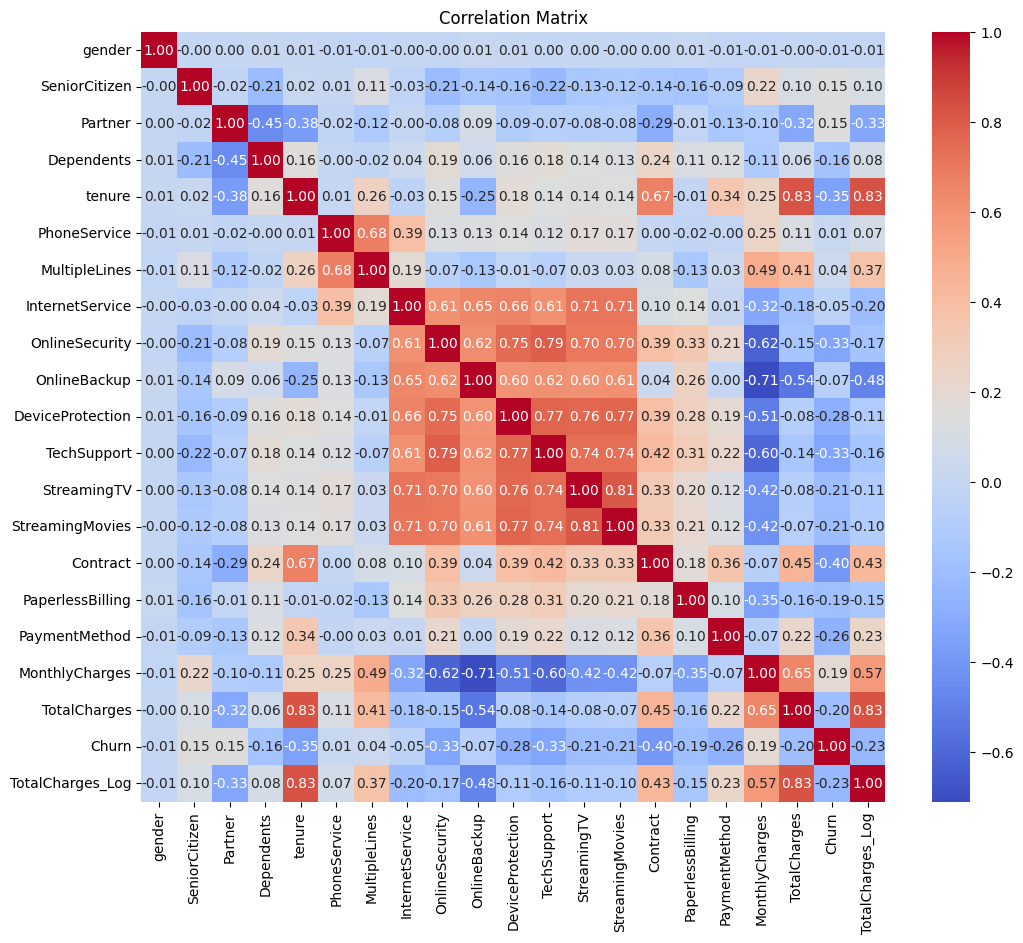

In [ ]:
correlation = correlationMatric(df_encoded)

we need to check the correlaiton that are below a certain threshlod that indicates that the variable have little effect on the churn

In [ ]:
correlation['Churn_C'] = abs(correlation['Churn'])<0.1
print(correlation[['Churn','Churn_C']])


                     Churn  Churn_C
gender           -0.008612     True
SeniorCitizen     0.150889    False
Partner           0.150448    False
Dependents       -0.164221    False
tenure           -0.352229    False
PhoneService      0.011942     True
MultipleLines     0.036310     True
InternetService  -0.047291     True
OnlineSecurity   -0.332819    False
OnlineBackup     -0.074205     True
DeviceProtection -0.281465    False
TechSupport      -0.329852    False
StreamingTV      -0.205742    False
StreamingMovies  -0.207256    False
Contract         -0.396713    False
PaperlessBilling -0.191825    False
PaymentMethod    -0.262818    False
MonthlyCharges    0.193356    False
TotalCharges     -0.198324    False
Churn             1.000000    False
TotalCharges_Log -0.233966    False


In [ ]:
columns = correlation[correlation['Churn_C']==True].index.to_list()
print("remove columns: ",columns)
df_encoded= df_encoded.drop(columns,axis=1)
df_encoded.head()

remove columns:  ['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup']


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Log
0,0,0,0,1,0,...,0,29.85,29.85,0,3.429137
1,0,1,0,34,1,...,1,56.95,1889.50,0,7.544597
2,0,1,0,2,1,...,1,53.85,108.15,1,4.692723
3,0,1,0,45,1,...,2,42.30,1840.75,0,7.518471
4,0,1,0,2,0,...,0,70.70,151.65,1,5.028148


In [ ]:
df_encoded.drop('TotalCharges',axis=1)
df_encoded.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Log
0,0,0,0,1,0,0,0,0,0,0,0,0,29.85,29.85,0,3.429137
1,0,1,0,34,1,1,0,0,0,1,1,1,56.95,1889.50,0,7.544597
2,0,1,0,2,1,0,0,0,0,0,0,1,53.85,108.15,1,4.692723
3,0,1,0,45,1,1,1,0,0,1,1,2,42.30,1840.75,0,7.518471
4,0,1,0,2,0,0,0,0,0,0,0,0,70.70,151.65,1,5.028148


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   DeviceProtection  7043 non-null   int64  
 6   TechSupport       7043 non-null   int64  
 7   StreamingTV       7043 non-null   int64  
 8   StreamingMovies   7043 non-null   int64  
 9   Contract          7043 non-null   int64  
 10  PaperlessBilling  7043 non-null   int64  
 11  PaymentMethod     7043 non-null   int64  
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7043 non-null   float64
 14  Churn             7043 non-null   int64  
 15  TotalCharges_Log  7043 non-null   float64
dtypes: float64(3), int64(13)
memory usage: 880

#scalling and component analysis

we will use minmaxscaler as the values we have seen doesn't follow normal distripution adn we already handled outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
df_scaled = df_encoded.copy()
df_scaled['tenure'] = mms.fit_transform(df_encoded[['tenure']])
df_scaled['MonthlyCharges'] = mms.fit_transform(df_encoded[['MonthlyCharges']])
df_scaled['TotalCharges_Log'] = mms.fit_transform(df_encoded[['TotalCharges_Log']])
df_scaled.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Log
0,0,0,0,0.013889,0,0,0,0,0,0,0,0,0.115423,29.85,0,0.378098
1,0,1,0,0.472222,1,1,0,0,0,1,1,1,0.385075,1889.50,0,0.831870
2,0,1,0,0.027778,1,0,0,0,0,0,0,1,0.354229,108.15,1,0.517421
3,0,1,0,0.625000,1,1,1,0,0,1,1,2,0.239303,1840.75,0,0.828989
4,0,1,0,0.027778,0,0,0,0,0,0,0,0,0.521891,151.65,1,0.554405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


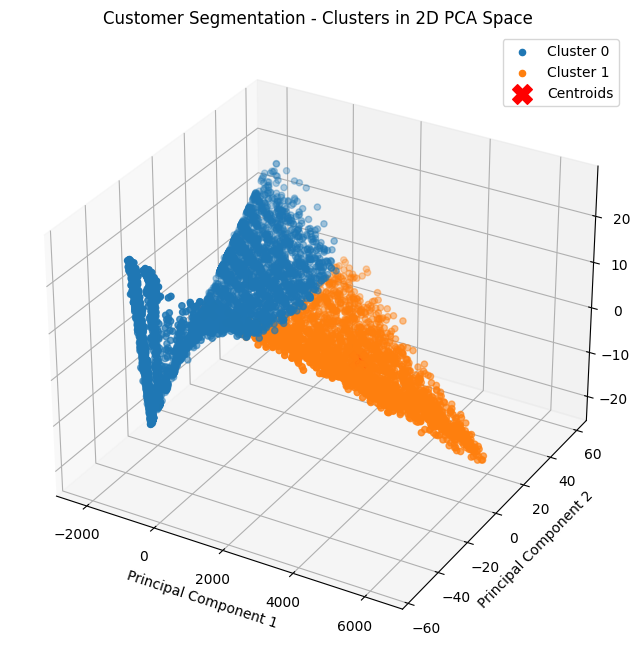

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
clustering_features = ["tenure", "MonthlyCharges", "TotalCharges",
                       "SeniorCitizen", "Partner", "Dependents",
                       "OnlineSecurity",  "DeviceProtection",
                       "TechSupport", "StreamingTV", "StreamingMovies",
                       "Contract", "PaperlessBilling", "PaymentMethod"]

df_scaled = df_encoded.copy()
X = df_scaled[clustering_features].copy()
#X = X.drop(['Churn','TotalCharges','MonthlyCharges'],axis=1)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Use KMeans for clustering
num_clusters = 2  # You can adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(X_pca)
df_scaled['PCA1'] = X_pca[:, 0]
df_scaled['PCA2'] = X_pca[:, 1]
df_scaled['PCA3'] = X_pca[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

for cluster in range(num_clusters):
    ax.scatter(df_scaled[df_scaled['Cluster'] == cluster]['PCA1'],
               df_scaled[df_scaled['Cluster'] == cluster]['PCA2'],
               df_scaled[df_scaled['Cluster'] == cluster]['PCA3'],
               label=f'Cluster {cluster}')

# Get cluster centroids in 3D space
centroids_3d = kmeans.cluster_centers_

# Plot cluster centroids
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1],centroids_3d[:, 2],
           marker='X', s=200, c='red', label='Centroids')



plt.title('Customer Segmentation - Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#Modelling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
X = df_scaled.copy()
X=X.drop(['Churn','TotalCharges'],axis=1)
y = df_scaled['Churn']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [ ]:
# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)


In [ ]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)


In [ ]:
models = [logreg, svm_classifier, rf_classifier, gb_classifier]


In [ ]:
def fitNperd_models(models,X_train,y_train,X_test):
  trainedData={}
  i=0
  for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    trainedData[model]=y_pred

  return trainedData



#Evaluation

In [ ]:


scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
}

In [ ]:

# Perform cross-validation
for model in models:
    print(f"--- {model.__class__.__name__} ---")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring_metrics)

    # Print average metrics across all folds
    for metric, scores in cv_results.items():

          print(f"{metric.capitalize()}: {scores.mean():.4f} (std: {scores.std():.4f})")

    print("\n")

--- LogisticRegression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fit_time: 0.2519 (std: 0.1369)
Score_time: 0.0381 (std: 0.0122)
Test_accuracy: 0.8016 (std: 0.0068)
Test_precision: 0.6599 (std: 0.0186)
Test_recall: 0.5222 (std: 0.0169)
Test_f1: 0.5828 (std: 0.0140)
Test_roc_auc: 0.8447 (std: 0.0102)


--- SVC ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Fit_time: 1.4560 (std: 0.3072)
Score_time: 0.7798 (std: 0.3101)
Test_accuracy: 0.7346 (std: 0.0002)
Test_precision: 0.0000 (std: 0.0000)
Test_recall: 0.0000 (std: 0.0000)
Test_f1: 0.0000 (std: 0.0000)
Test_roc_auc: 0.7897 (std: 0.0097)


--- RandomForestClassifier ---
Fit_time: 1.2794 (std: 0.1304)
Score_time: 0.0971 (std: 0.0226)
Test_accuracy: 0.7863 (std: 0.0122)
Test_precision: 0.6252 (std: 0.0294)
Test_recall: 0.4869 (std: 0.0235)
Test_f1: 0.5474 (std: 0.0252)
Test_roc_auc: 0.8249 (std: 0.0121)


--- GradientBoostingClassifier ---
Fit_time: 2.0581 (std: 0.4001)
Score_time: 0.0208 (std: 0.0035)
Test_accuracy: 0.8002 (std: 0.0108)
Test_precision: 0.6591 (std: 0.0283)
Test_recall: 0.5131 (std: 0.0151)
Test_f1: 0.5770 (std: 0.0199)
Test_roc_auc: 0.8429 (std: 0.0104)




In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
# Evaluate models
def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    # ROC Curve

    print("ROC Curve:")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

--- Logistic Regression ---
Accuracy: 0.8041
Precision: 0.6590
Recall: 0.5389
F1 Score: 0.5929
ROC-AUC Score: 0.8626
Confusion Matrix:
[[932 104]
 [172 201]]


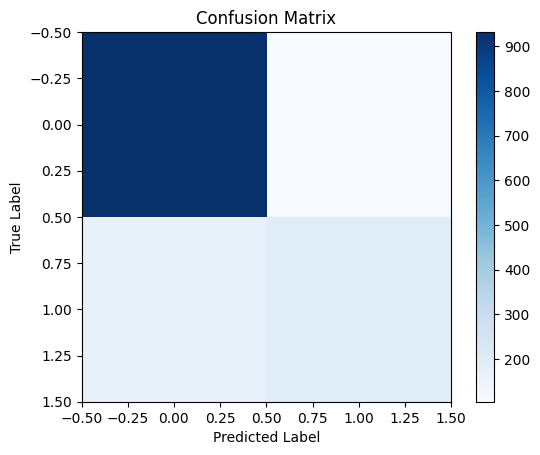

ROC Curve:


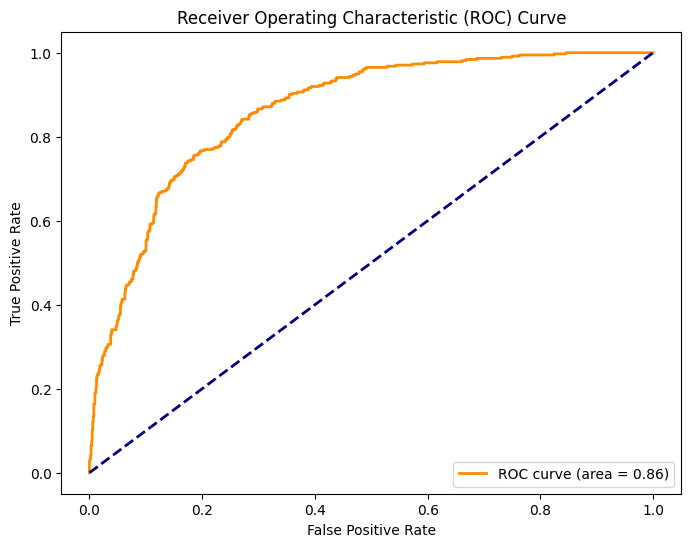

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- Support Vector Machine (SVM) ---
Accuracy: 0.7353
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.8152
Confusion Matrix:
[[1036    0]
 [ 373    0]]


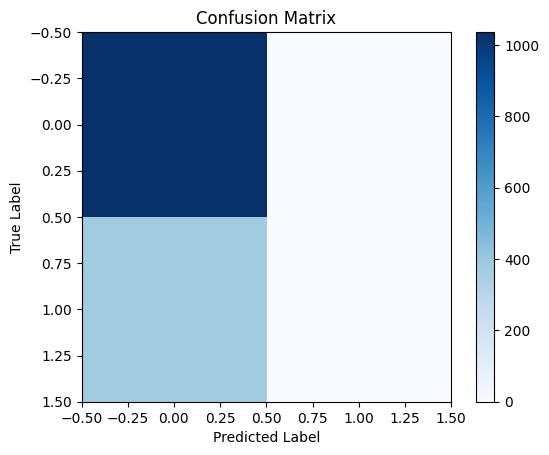

ROC Curve:


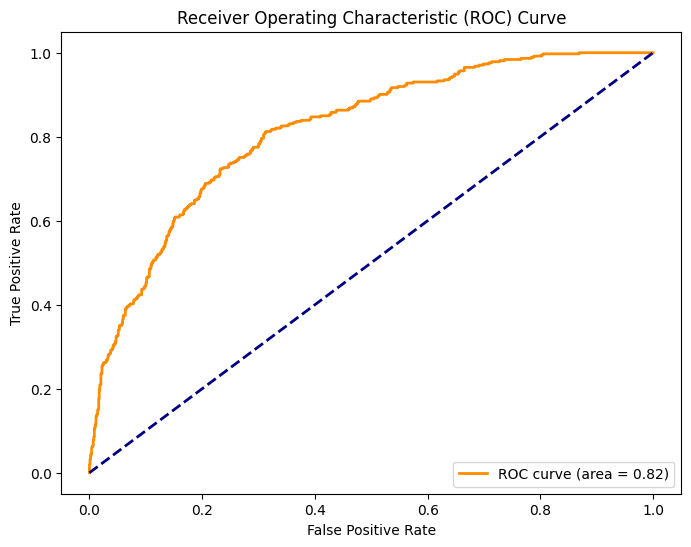

--- Random Forest Classifier ---
Accuracy: 0.7892
Precision: 0.6397
Recall: 0.4665
F1 Score: 0.5395
ROC-AUC Score: 0.8252
Confusion Matrix:
[[938  98]
 [199 174]]


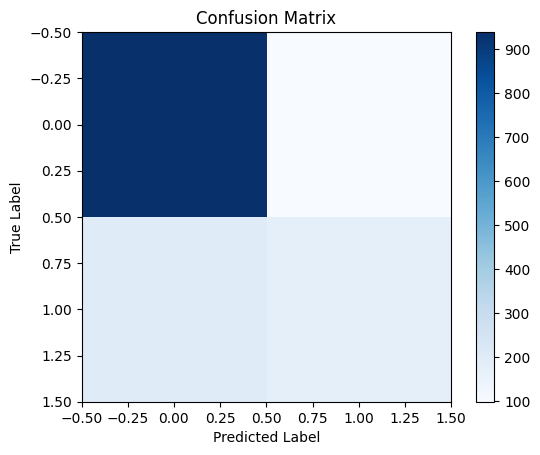

ROC Curve:


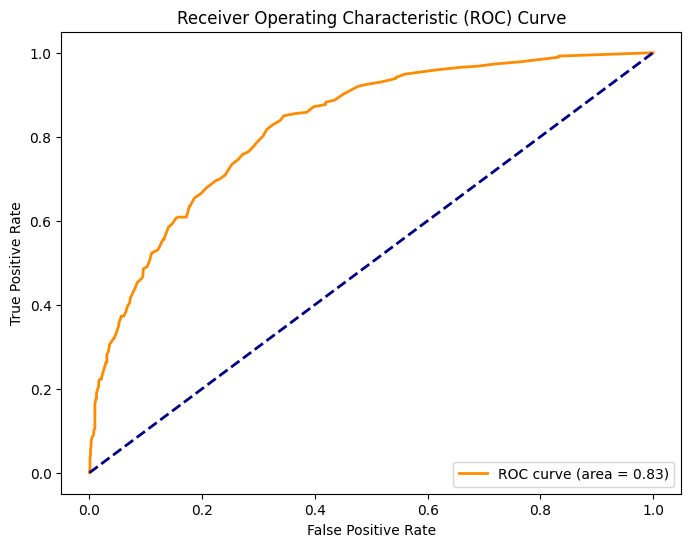

--- Gradient Boosting Classifier ---
Accuracy: 0.8077
Precision: 0.6723
Recall: 0.5335
F1 Score: 0.5949
ROC-AUC Score: 0.8594
Confusion Matrix:
[[939  97]
 [174 199]]


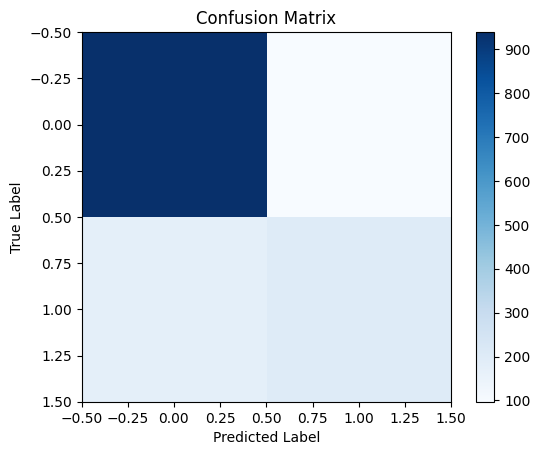

ROC Curve:


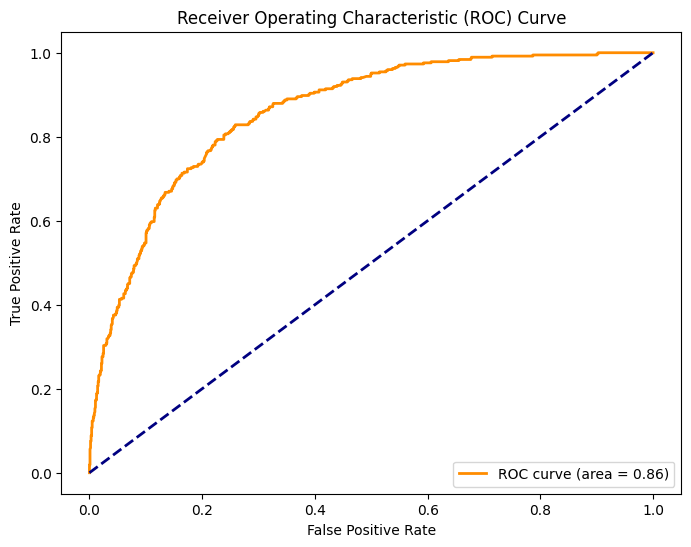

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, logreg.predict_proba(X_test)[:, 1], "Logistic Regression")

# Evaluate Support Vector Machine (SVM)
evaluate_model(y_test, y_pred_svm, svm_classifier.decision_function(X_test), "Support Vector Machine (SVM)")

# Evaluate Random Forest Classifier
evaluate_model(y_test, y_pred_rf, rf_classifier.predict_proba(X_test)[:, 1], "Random Forest Classifier")

# Evaluate Gradient Boosting Classifier
evaluate_model(y_test, y_pred_gb, gb_classifier.predict_proba(X_test)[:, 1], "Gradient Boosting Classifier")


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,y = smt.fit_resample(X,y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [ ]:
predictions = fitNperd_models(models,x_train,y_train,x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.8193
Precision: 0.7913
Recall: 0.8650
F1 Score: 0.8265
ROC-AUC Score: 0.9022
Confusion Matrix:
[[805 235]
 [139 891]]


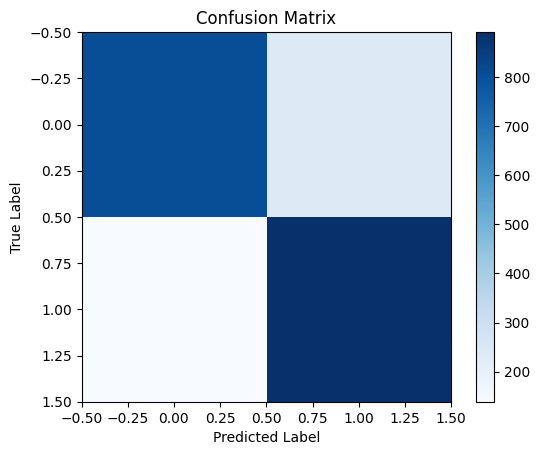

ROC Curve:


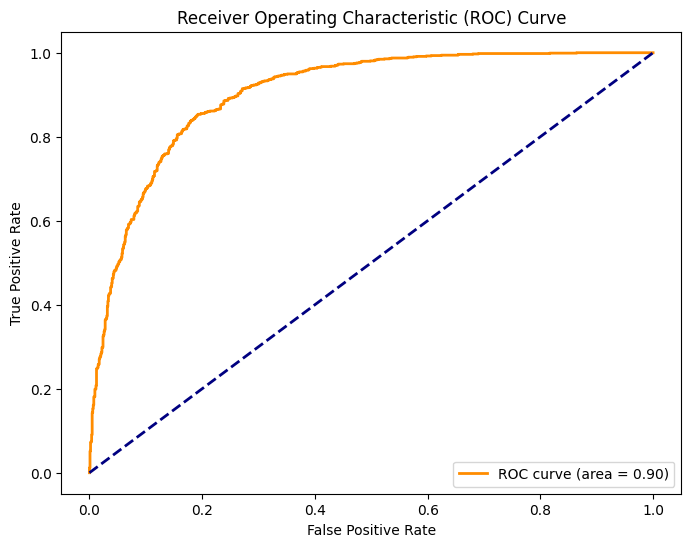

--- Support Vector Machine (SVM) ---
Accuracy: 0.6913
Precision: 0.6760
Recall: 0.7291
F1 Score: 0.7015
ROC-AUC Score: 0.7769
Confusion Matrix:
[[680 360]
 [279 751]]


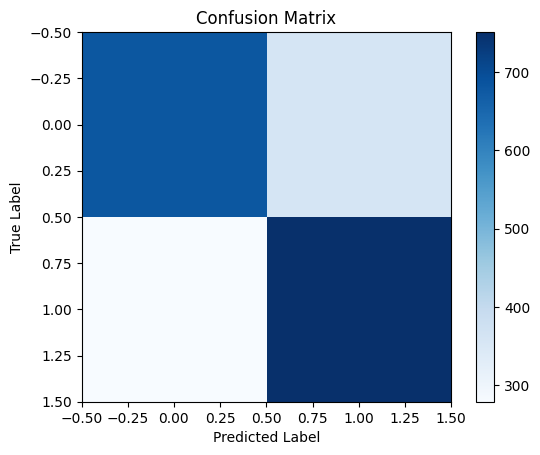

ROC Curve:


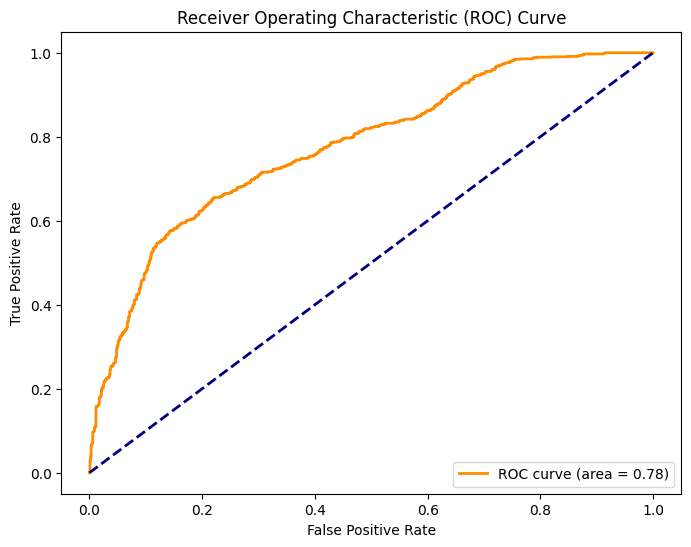

--- Random Forest Classifier ---
Accuracy: 0.8425
Precision: 0.8340
Recall: 0.8534
F1 Score: 0.8436
ROC-AUC Score: 0.9244
Confusion Matrix:
[[865 175]
 [151 879]]


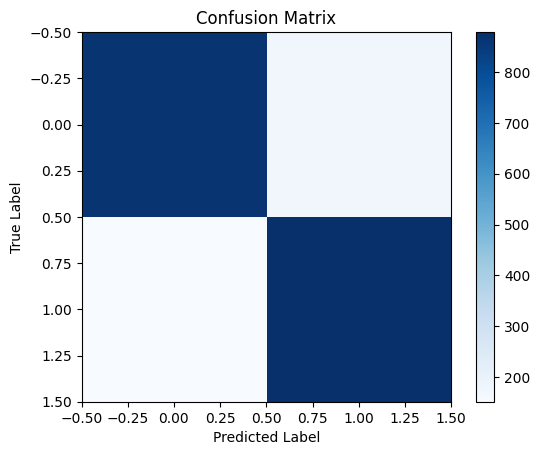

ROC Curve:


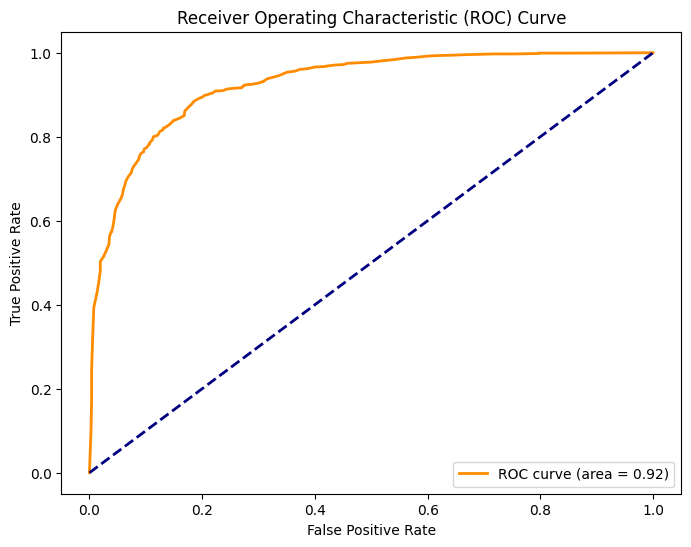

--- Gradient Boosting Classifier ---
Accuracy: 0.8304
Precision: 0.8072
Recall: 0.8660
F1 Score: 0.8356
ROC-AUC Score: 0.9079
Confusion Matrix:
[[827 213]
 [138 892]]


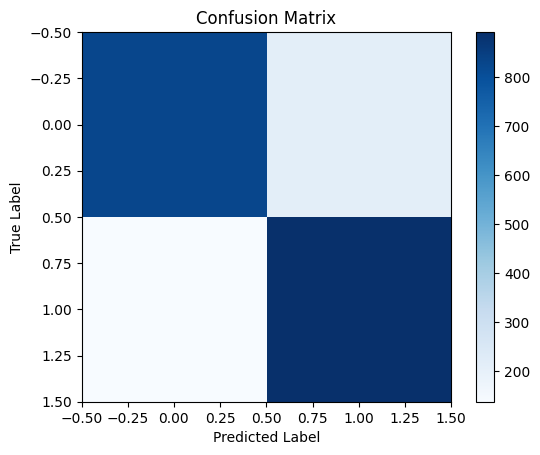

ROC Curve:


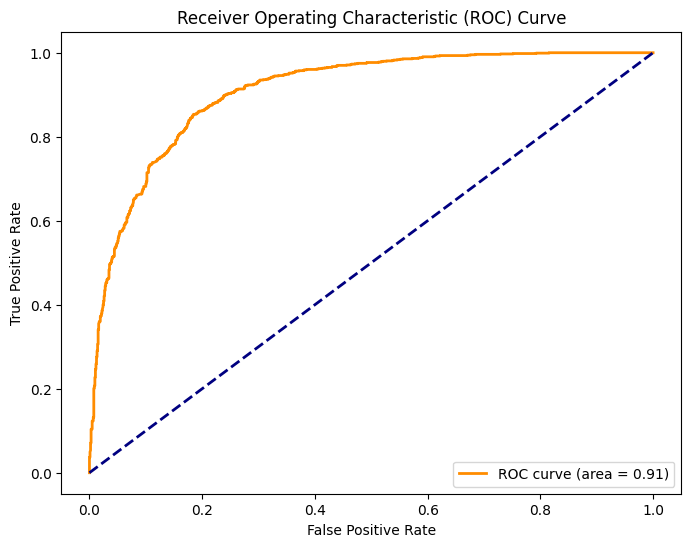

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test, predictions[models[0]], logreg.predict_proba(x_test)[:, 1], "Logistic Regression")

# Evaluate Support Vector Machine (SVM)
evaluate_model(y_test, predictions[models[1]], svm_classifier.decision_function(x_test), "Support Vector Machine (SVM)")

# Evaluate Random Forest Classifier
evaluate_model(y_test, predictions[models[2]], rf_classifier.predict_proba(x_test)[:, 1], "Random Forest Classifier")

# Evaluate Gradient Boosting Classifier
evaluate_model(y_test, predictions[models[3]], gb_classifier.predict_proba(x_test)[:, 1], "Gradient Boosting Classifier")

we want to predict if the person has churned or not,
but our main focus is identifing false negative values so we will choose recall as out metric also we will look at roc as our data was impalanced as we discussed so the best choice will be the random forest classifier

#Fine tuning

we will expand the model to choose the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}
model = RandomForestClassifier()
clf = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
clf = clf.fit(x_train, y_train)


In [2]:
best_param = clf.best_params_
print(best_param)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [1]:
params = { 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
classifier_Tree = RandomForestClassifier(**params)

classifier_Tree.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

--- Random Forest Classifier ---
Accuracy: 0.8425
Precision: 0.8340
Recall: 0.8534
F1 Score: 0.8436
ROC-AUC Score: 0.9257
Confusion Matrix:
[[865 175]
 [151 879]]


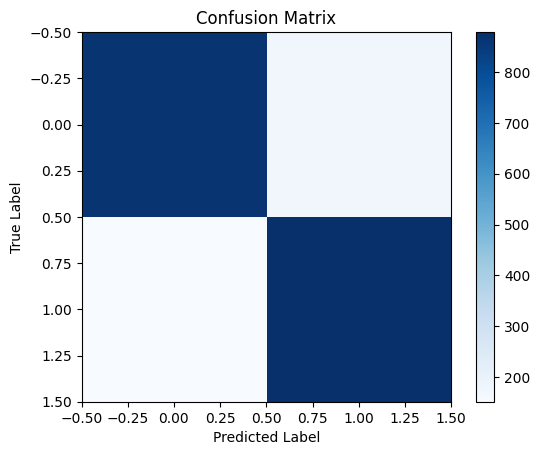

ROC Curve:


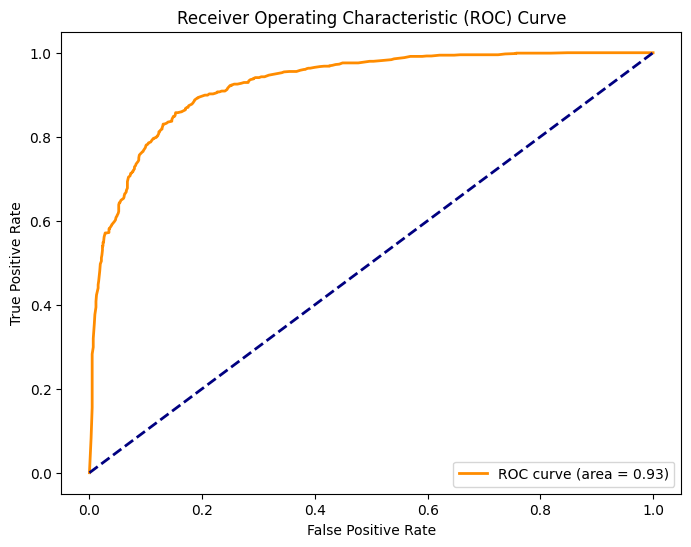

In [ ]:
# Evaluate Random Forest Classifier
evaluate_model(y_test,y_pred, classifier_Tree.predict_proba(x_test)[:, 1], "Random Forest Classifier")
